In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
from tensorflow.keras.models import load_model

# 📌 Cell 2: Load Processed Data
data_path = "../data/processed/processed.csv"
df = pd.read_csv(data_path)
print("✅ Data loaded successfully")

# 📌 Cell 3: Prepare Features and Target
target_col = "AQI"
X = df.drop(columns=[target_col])
y = df[target_col]

# 📌 Identify Categorical Columns and Convert Them
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Apply One-Hot Encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# 📌 Cell 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 📌 Ensure all columns in X_train are numeric
print("Data types of X_train after encoding:")
print(X_train.dtypes)

# Convert any non-numeric columns to numeric (if any)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Handle NaN values in X_train by filling with the mean
X_train = X_train.fillna(X_train.mean())

# 📌 Step 5: Handle NaNs in the Test Set Similarly
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(X_test.mean())

# 📌 Check if there are any NaN values left in the dataset
print("Remaining NaNs in X_train:", X_train.isna().sum().sum())
print("Remaining NaNs in X_test:", X_test.isna().sum().sum())
print("Remaining NaNs in y_train:", y_train.isna().sum())
print("Remaining NaNs in y_test:", y_test.isna().sum())

# 📌 Cell 6: Cross-validation with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores: {-cv_scores}")
print(f"Average MSE: {-cv_scores.mean():.4f}")

# 📌 Cell 7: Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

# 📌 Step 8: Train the Random Forest model
best_rf_model = grid_search.best_estimator_

# 📌 Step 9: Make predictions with the Random Forest model
rf_preds = best_rf_model.predict(X_test)

# 📌 Step 10: Calculate evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest - MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")

# 📌 Step 11: Save Random Forest Model
joblib.dump(best_rf_model, "../models/random_forest_model.pkl")
print("✅ Random Forest model saved!")

# 📌 Step 12: Load the Neural Network Model
nn_model_path = r"D:\\Codes\\Projects\\ML\\air_quality_model\\models\\neural_network_model.keras"
nn_model = load_model(nn_model_path)
print("✅ Neural Network model loaded!")



✅ Data loaded successfully
Categorical Columns: Index(['City', 'Date', 'AQI_Bucket'], dtype='object')
Data types of X_train after encoding:
PM2.5                      float64
PM10                       float64
NO                         float64
NO2                        float64
NOx                        float64
                            ...   
AQI_Bucket_Moderate           bool
AQI_Bucket_Poor               bool
AQI_Bucket_Satisfactory       bool
AQI_Bucket_Severe             bool
AQI_Bucket_Very Poor          bool
Length: 2050, dtype: object
Remaining NaNs in X_train: 0
Remaining NaNs in X_test: 0
Remaining NaNs in y_train: 0
Remaining NaNs in y_test: 0
Cross-validation MSE scores: [ 819.57904623 1243.45119071 1024.86603225  992.03382316 1102.55293158]
Average MSE: 1036.4966
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - MSE: 687.5556, MAE: 13.0980, R²: 0.9544
✅ Random Forest model saved!
✅ Neural Network model loaded!


C:\Users\Boopathi Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 11955.7129
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3146.9492
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2576.4395
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2765.4214
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2288.2830
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2230.2197
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2026.7826
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2100.6675
Epoch 9/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1840.4880
Epoch 10/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1877.9912
Epoch 11/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1812.0188
Epoch 12/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1752.2184
Epoch 13/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1576.8604
Epoch 14/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1842.5172
Epoch 15/50
73

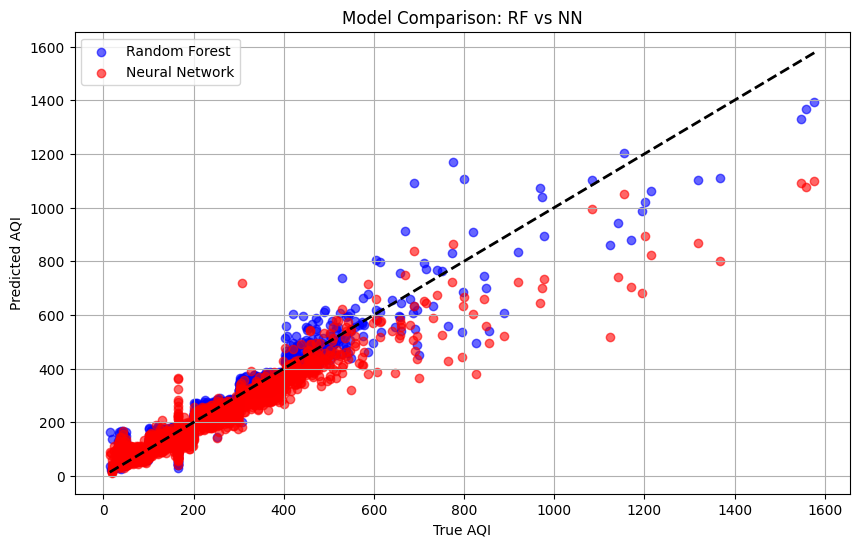

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load processed dataset
df = pd.read_csv("../data/processed/processed.csv")
target_col = "AQI"

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True)

# Split train/test
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Save column order for alignment
nn_training_columns = X_train_nn.columns.tolist()

# ✅ Build and train NN model with correct input shape
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=len(nn_training_columns)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, verbose=1)

# ✅ Align X_test_nn to training columns
X_test_nn = X_test_nn.reindex(columns=nn_training_columns, fill_value=0)
X_test_nn = X_test_nn.fillna(X_test_nn.mean())

# Check shapes
print("Expected shape by model:", nn_model.input_shape)
print("Shape of X_test_nn:", X_test_nn.shape)

# ✅ Predict
nn_preds = nn_model.predict(X_test_nn).flatten()

# 📊 Evaluate
print("Neural Network Evaluation:")
print(f"  MSE: {mean_squared_error(y_test_nn, nn_preds):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_nn, nn_preds):.4f}")
print(f"  R² : {r2_score(y_test_nn, nn_preds):.4f}")


# 📌 Step 15: Compare Models (Scatter Plot)

# ⚠️ Ensure Random Forest predictions are aligned with same y_test_nn
# If needed, align or recompute rf_preds using X_test_nn

plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest predictions
plt.scatter(y_test_nn, rf_preds, color='blue', label='Random Forest', alpha=0.6)

# Scatter plot for Neural Network predictions
plt.scatter(y_test_nn, nn_preds, color='red', label='Neural Network', alpha=0.6)

# Ideal diagonal line
plt.plot([y_test_nn.min(), y_test_nn.max()], [y_test_nn.min(), y_test_nn.max()], 'k--', lw=2)

# Labels and title
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.title('Model Comparison: RF vs NN')

# Legend and grid
plt.legend()
plt.grid(True)
plt.show()
